In [ ]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [ ]:
df = pd.read_csv('/content/haberman (1).csv')

In [ ]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.columns = ['Age','Year','Nodes','Survival']

In [ ]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# #AGENDA: Given a patient with the Some Age, Year of Operation and number of Lymph nodes detected, we have to predict or conclude the chances whether the patient will live less then 5 years or more then 5 years.

1.  Survival

In [ ]:
df.shape

(305, 4)

In [ ]:
df.isnull().sum()

,0
Age,0
Year,0
Nodes,0
Survival,0


In [ ]:
df.duplicated().value_counts()

,count
False,288
True,17


In [ ]:
# we will not remove duplicates , in this case scenario it might happen.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.Survival.value_counts()

,count
Survival,
1,224
2,81


In [ ]:

df = df.replace([1,2],[0,1])

In [ ]:
df.Survival.value_counts()

,count
Survival,
0,224
1,81


In [ ]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [ ]:
# Min(Age) = 30, Max(Age) = 83, Year of operation = [1958,1969], Nodes = [0,52], Survival = [0,1]
# Nodes have higher count density between 0 and 4 (75 percentile)


# UNIVARIATE ANALYSIS

In [ ]:

df.Survival.value_counts()

,count
Survival,
0,224
1,81


In [ ]:
df.Survival.value_counts(1)

,proportion
Survival,
0,0.734426
1,0.265574


In [ ]:
# There are only 27% people survives less than 5 years, which means dataset is imbalanced

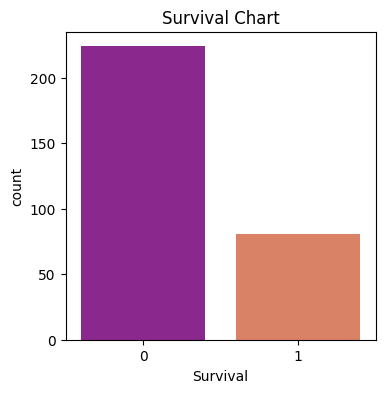

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x='Survival',data = df,palette = 'plasma')
plt.title('Survival Chart')
plt.show()

2.  **Age**

In [ ]:
df.Age.describe()

,Age
count,305.000000
mean,52.531148
std,10.744024
min,30.000000
25%,44.000000
50%,52.000000
75%,61.000000
max,83.000000


0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

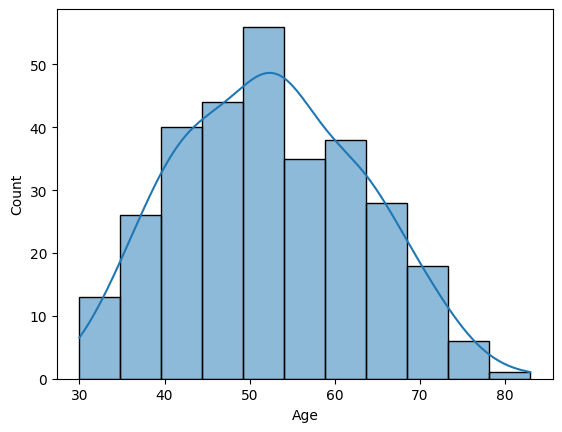

In [ ]:

print(df.Age.skew())
sns.histplot(x = 'Age',data = df,binwidth = 5 , kde = True)



The expression df.Age.skew() calculates the skewness of the Age column in a pandas DataFrame df.
Skewness is a measure of the asymmetry of a distribution. It helps identify whether the data in the column
 is symmetrically distributed, positively skewed (right-tailed), or negatively skewed (left-tailed).

 Kde gives probability density of figure or function


In [ ]:
# The maximum people are operated at the age group of 50 to 55.

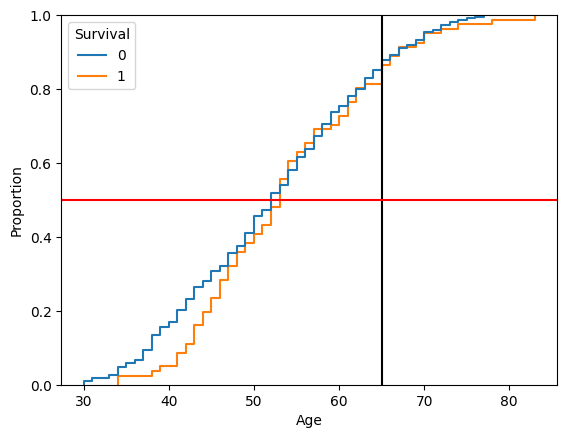

In [ ]:
sns.ecdfplot(x = 'Age', data=df, hue = 'Survival' )
plt.axvline(65,c='black')
plt.axhline(0.5,c='red')


In [ ]:
 # 80 % percent of the people are at the age of 65 or below.
 # 50 % percent of the people are at the age of 52 or below.

Operation **year**

<Axes: xlabel='Year'>

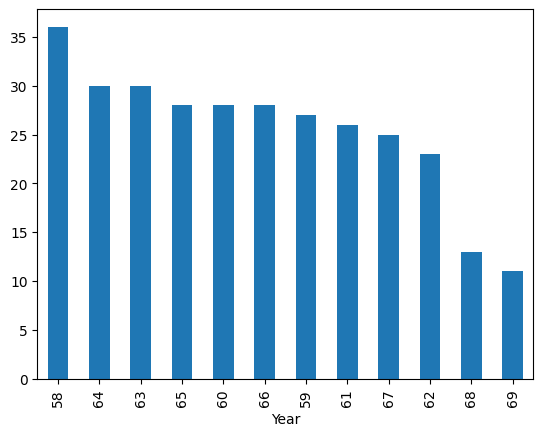

In [ ]:
df.Year.value_counts().plot(kind = 'bar')

In [ ]:
# This graph shows that the trend of operation are reduced.

**Lymph Nodes**

In [ ]:
df.Nodes.describe()

,Nodes
count,305.000000
mean,3.839344
std,7.283978
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,52.000000


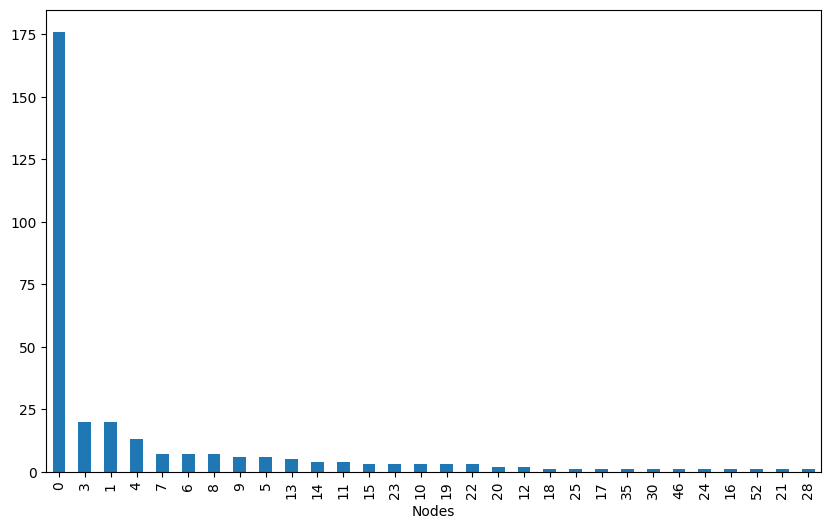

In [ ]:
plt.figure(figsize=(10,6))
df.Nodes.value_counts().plot(kind = 'bar')
plt.show()

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

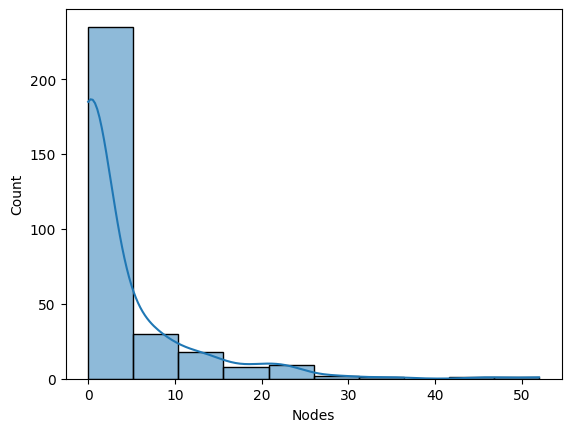

In [ ]:
print(df.Nodes.skew())
sns.histplot(x = 'Nodes',data = df,binwidth = 5 , kde = True)


In [ ]:
# Skewness is approximate 3, maximum density count for nodes is between 0 to 10.

# BIVARIATE ANALYSIS



In [ ]:
# Age - Survivals

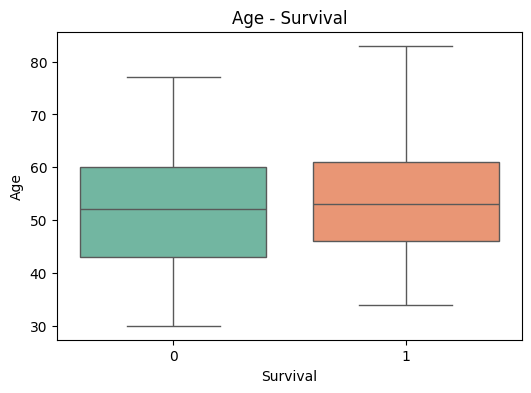

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Survival',y = 'Age',data = df, palette="Set2")
plt.title('Age - Survival')
plt.show()

In [ ]:
# people with age>77 will actually live lesser than 5 years (99% probability)
# people with age<35 will actually live more than 5 years (99% probability)

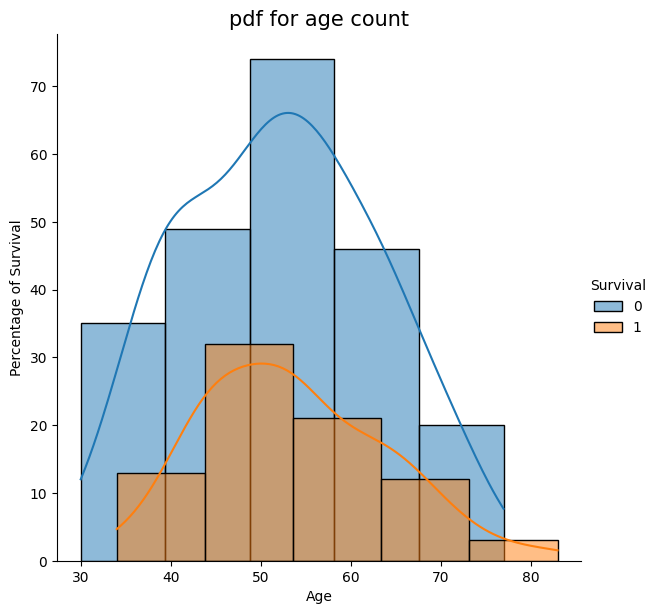

In [ ]:
sns.FacetGrid(df,hue = 'Survival',height = 6).map(sns.histplot,'Age',bins = 5,kde = True).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('pdf for age count', size = 15)
plt.show()



# maximum percentage of people living lesser than 5 years are between 45 to 55.
# people between 33 to 35 Age are live more than 5 years.
# People with Age>77 live lesser than 5 years.

> Add blockquote



In [ ]:
df.groupby('Age')['Survival'].sum().sort_values(ascending = False)

,Survival
Age,
53,6
46,4
43,4
65,4
54,4
52,4
47,3
61,3
45,3


In [ ]:

# I have group the data set by Age and then we taken the sum of Survivals.

In [ ]:
# So, 6 peoples are live lesser than 5 years at the age of 53

In [ ]:

df.Age.value_counts().sort_values(ascending = False)

,count
Age,
52,14
54,13
50,12
57,11
53,11
47,11
43,11
65,10
38,10


In [ ]:
# It gives that at the age of 52 years only 14 peoples are live lesser than 5 years

# Age-Nodes

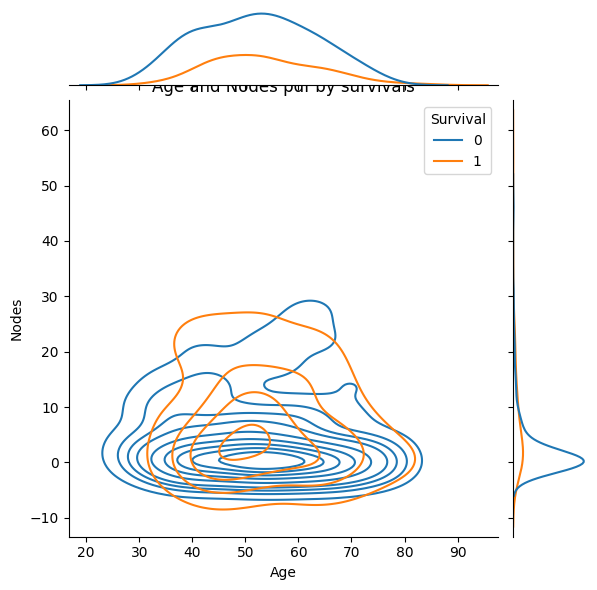

In [ ]:
sns.jointplot(x='Age',y='Nodes',data = df, hue='Survival',kind='kde')
plt.title('Age and Nodes pdf by survivals')
plt.show()

In [ ]:
# AGE [43,53] and Nodes[10-52] live less than 5 years

<Axes: xlabel='Survival', ylabel='Nodes'>

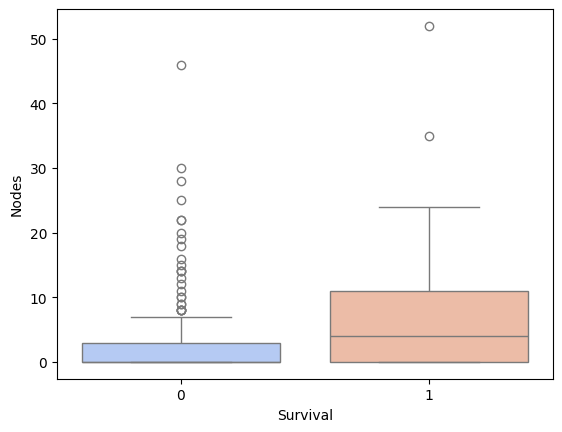

In [ ]:
sns.boxplot(x = 'Survival', y = 'Nodes', data = df, palette = 'coolwarm')

In [ ]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending = False)

,Survival
Nodes,
0,27
3,7
1,5
13,4
5,4
9,4
4,3
6,3
23,3


In [ ]:
df.Nodes.value_counts().sort_values(ascending = False)

,count
Nodes,
0,176
1,20
3,20
4,13
7,7
6,7
8,7
9,6
5,6



```
# 0 - 17 %  , So people with 0 nodes have 17 % chances they will die before 5 years
#  1 - 25 %
#  3 - 35 %
#  4 - 23 %
#  5 - 66%
#  6 - 42 %
#  7 - 28 %
#  8 - 28 %
#  9 - 66 %
#  10 - 33%

```




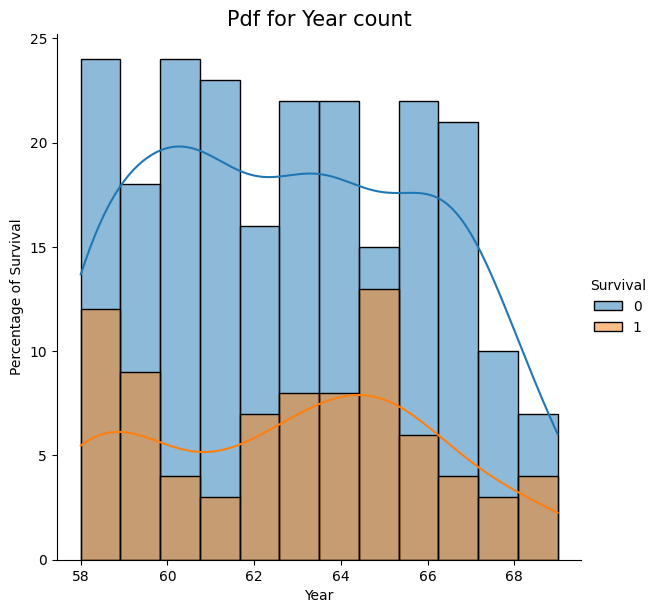

In [ ]:
sns.FacetGrid(df,hue = 'Survival',height = 6).map(sns.histplot,'Year',bins = 12,kde = True).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('Pdf for Year count', size = 15)
plt.show()


In [ ]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In [ ]:
4/11

0.36363636363636365



```
# 1958 - 32 % people died
# 1959 - 33 % people died
# 1960 - 14 % people died
# 1965 - 46 % people died , This is maximum
# 1969 - 36 % people died
```



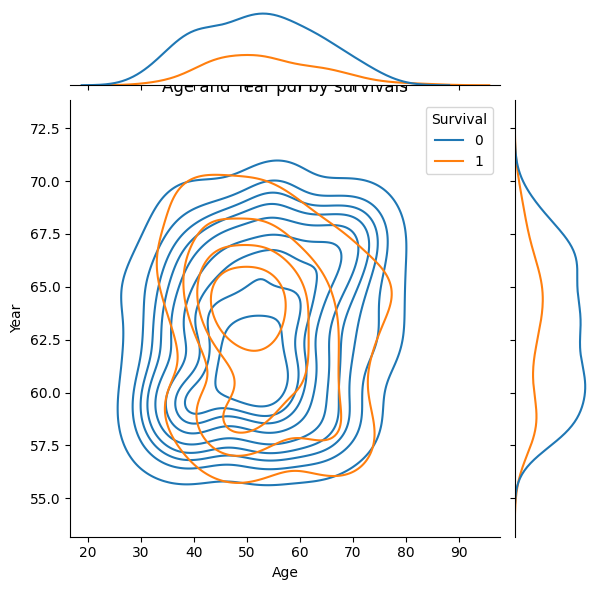

In [ ]:
sns.jointplot(x='Age',y='Year',data = df, hue='Survival',kind='kde')
plt.title('Age and Year pdf by survivals')
plt.show()

# MULTIVARIATE ANALYSIS

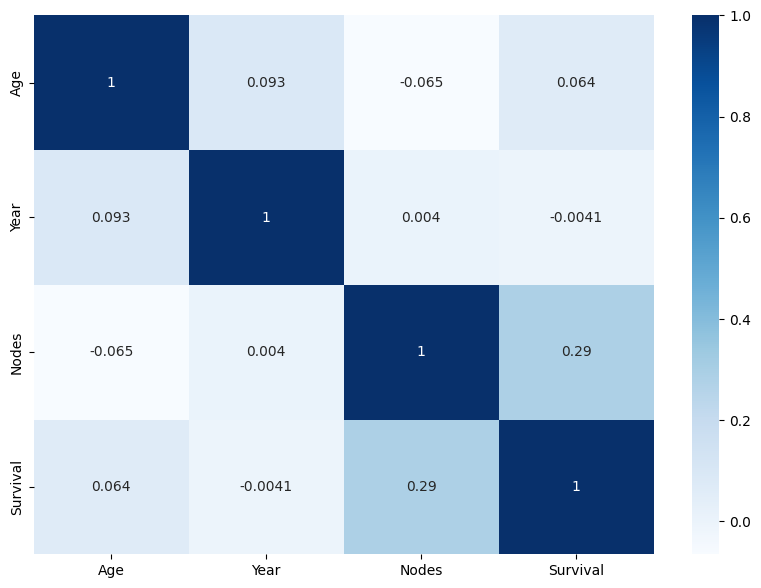

In [ ]:
plt.figure(figsize = (10,7))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'Blues', annot = True);

**Nodes and Survival are Corelated by 29 %**